In [0]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, confusion_matrix, mutual_info_score, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold

# Download the Data 
Keep this if you are working in Google Colab. Delete this if you are working on your own computer and have the data downloaded already. 

In [0]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3' -O lendingclub.csv

--2020-02-03 18:10:04--  https://docs.google.com/uc?export=download&id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3
Resolving docs.google.com (docs.google.com)... 108.177.125.138, 108.177.125.139, 108.177.125.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.125.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g2ofbk51itvl9udbd0a55cc28rr6omn9/1580752800000/09819396713149841370/*/0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3?e=download [following]
--2020-02-03 18:10:04--  https://doc-10-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g2ofbk51itvl9udbd0a55cc28rr6omn9/1580752800000/09819396713149841370/*/0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3?e=download
Resolving doc-10-5c-docs.googleusercontent.com (doc-10-5c-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting 

# Introduction to homework 1
On Canvas (or in this notebook's files) you’ll find a new file, **lendingclub.csv**. Each row of this file represents a single user
account on **LendingClub.com**. The site consists of two types of users, **borrowers** who are applying for a new loan, and **investors** who lend money for fixed periods of time. Each row in our dataset represents a single borrower at the time they apply for their first peer-to-peer loan, and each row contains nine columns:

- Amount requested for their first loan
- Year the loan was requested (this dataset covers only a five-year period, 2008-2012)
- Title of the loan application (written by the borrower)
- FICO score (credit rating) of the borrower
- “Debt-to-Income”: A ratio of the borrower’s total monthly debt payments, excluding home
mortgage and the requested loan, to the borrower’s self-reported monthly income.
- ZIP code of the borrower (the last two digits of each ZIP are masked for anonymity)
- U.S. state that the borrower resides in.
- Length of time that the borrower has been employed at their current job, from 0 to 10+ years.
- A binary outcome variable for whether the user’s loan application was accepted by investors.

Our goal with this project will be to automatically predict whether a borrower will be approved for a loan from the investor members of the website, based only on the data provided above. For each of the following questions, add a series of code and markdown cells to develop an easily readable report responding to the question. 

# Previewing Data

In [0]:
lending = pd.read_csv("lendingclub.csv")
lending.head()

,amount,date,title,fico,dti,zip,state,emp_length,policy_code,year,outcome
0,2500.0,Dec-2011,bike,740.0,1.00,309xx,GA,< 1 year,1.0,2011,accept
1,12000.0,Dec-2011,Consolidation,675.0,10.78,913xx,CA,10+ years,1.0,2011,accept
2,21000.0,Dec-2011,Debt Cleanup,705.0,13.22,335xx,FL,10+ years,1.0,2011,accept
3,31825.0,Dec-2011,Debt Consolidation Loan,760.0,14.03,080xx,NJ,5 years,1.0,2011,accept
4,12000.0,Dec-2011,Debt Consolidation,725.0,16.70,088xx,NJ,10+ years,1.0,2011,accept


In [0]:
lending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81103 entries, 0 to 81102
Data columns (total 11 columns):
amount         81103 non-null float64
date           81103 non-null object
title          81103 non-null object
fico           81103 non-null float64
dti            81103 non-null float64
zip            81103 non-null object
state          81103 non-null object
emp_length     81103 non-null object
policy_code    81103 non-null float64
year           81103 non-null int64
outcome        81103 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 6.8+ MB


In [0]:
lending.describe()

,amount,fico,dti,policy_code,year
count,81103.000000,81103.000000,8.110300e+04,81103.000000,81103.000000
mean,12959.437855,603.010961,5.142695e+02,0.113991,2011.097062
std,10315.880464,173.772811,1.700466e+04,0.317802,1.077031
min,500.000000,0.000000,-1.000000e+00,0.000000,2008.000000
25%,5000.000000,585.000000,6.530000e+00,0.000000,2011.000000
50%,10000.000000,653.000000,1.648000e+01,0.000000,2011.000000
75%,20000.000000,691.000000,2.888000e+01,0.000000,2012.000000
max,500000.000000,850.000000,3.418800e+06,1.000000,2012.000000


In [0]:
lending['title'].value_counts()

debt_consolidation        24217
other                      8877
credit_card                5246
car                        4061
home_improvement           4060
                          ...  
CC debt consolidation         1
Debt cons.                    1
January Loan                  1
 home improvment loan         1
credit card payoffs           1
Name: title, Length: 10004, dtype: int64

In [0]:
lending['fico'].describe()

count    81103.000000
mean       603.010961
std        173.772811
min          0.000000
25%        585.000000
50%        653.000000
75%        691.000000
max        850.000000
Name: fico, dtype: float64

In [0]:
lending['outcome'].value_counts()

reject    71858
accept     9245
Name: outcome, dtype: int64

In [0]:
lending['emp_length'].unique()

array(['< 1 year', '10+ years', '5 years', '9 years', '6 years',
       '2 years', '3 years', '7 years', '8 years', '4 years', '1 year'],
      dtype=object)

# Question 1:

**- Why is this data about users valuable to LendingClub?**

By recording instances of users’ borrowing, this data may help LendingClub to better profile their borrower users and understand their investor users’ preferences in order to increase business by adjusting operation strategies and improving transaction-facilitating services.

**- Name at least two different ways this automated prediction could be used either for in-app product changes, or business decision-making.**

As the ultimate goal for this prediction is to increase business and safely helping more borrowers find loan, the results of the prediction can be applied to helping applicants that might be rejected to loan and increasing the amount of money that potential successful borrowers might want to loan.
* Business Application 1: taking extra steps to add credibility for the possible rejected
>Among the criteria used to evaluate an application, FICO score, debt-to-income and length of employment seem to me only present one’s ability to pay debt based on the past without properly evaluating the potential increase in the borrower’s ability to pay. For example, for newly employed college graduates whose pay-ability changes dramatically after graduation or end of repaying student loan, or for someone is expecting long-term payment (rather than regular income) such as insurance or inheritance (maybe, I don’t know). And this might lead to unnecessary loss of business opportunities. Thus, to avoid such business loss and help more capable borrowers’ to loan, LendingClub can use the prediction of the results and add extra steps of proving repay-ability for those applicant predicted to be rejected. For instance, LendingClub can ask if the applicants is expecting any change in their abilities to repay by the time they have to repay and ask for relevant documentations to prove, and take these factors into evaluation and consideration.

* Business Application 2: adjust interest rates, amount limitations, etc. for the possible accepted
>Once the model predict an applicant to be capable financially to repay the loan, LendingClub can take this chance to ask whether the borrowers want to increase the amount of money they loan with an adjusted interest rate or other improved aspects of the deal policy.

# Question 2: 
Train a decision tree classifier to predict loan acceptance based on the features provided. Write a report giving at minimum the following information on your model:
- Class distribution of the outcome labels.
- List of features you used from the data, including their name and data type (numeric or
nominal). For each feature, provide min, mean, and max values (if the feature is numeric) or
list all possible labels (if the feature is nominal).
- List of hyperparameter settings for the decision tree.
- Performance of the trained classifier, using metrics like accuracy, kappa, precision, and recall. You must provide a labeled confusion matrix.

You should NOT perform any optimization; all you need to do is train a single decision tree and report results. You will be tuning hyperparameters and performing other evaluations in Homework 2.

    Number of Leaves: 2747
    Accuracy: 94.5%
    Kappa: 0.731
    Precision: 0.764
    Recall: 0.759
    F-Score: 0.762
    Confusion Matrix:


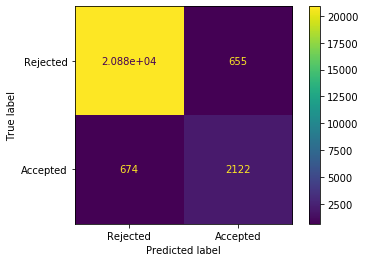

In [0]:
# create boolean variable to store outcome
lending['accepted'] = (lending['outcome'] == "accept")

# give emp_length variable with numeric labels
lending.replace({
    '< 1 year': 0,
    '10+ years': 10,
    '5 years': 5,
    '9 years': 9,
    '6 years': 6,
    '2 years': 2,
    '3 years': 3,
    '7 years': 7,
    '8 years': 8,
    '4 years': 4,
    '1 year': 1
}, inplace=True)

# a dictionary of potential feature sets to try
features = ['fico','amount','dti', 'emp_length']
    
# set up the datasets
X = lending.loc[:, features]
y = lending['accepted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# train the models
model = DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)
y_pred = model.predict(X_test)

# calculate metrics I want to use to compare different selected features
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)

# print the results of the calculation of the metrics
print(f"    Number of Leaves: {model.get_n_leaves()}")
print(f"    Accuracy: {100*accuracy:.1f}%")
print(f"    Kappa: {kappa:.3f}")
print(f"    Precision: {precision:.3f}")
print(f"    Recall: {recall:.3f}")
print(f"    F-Score: {f:.3f}")
print("    Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, ["Rejected", "Accepted"]).plot(values_format='.4g')
plt.show()

In [0]:
lending['dti'].describe()

count    8.110300e+04
mean     5.142695e+02
std      1.700466e+04
min     -1.000000e+00
25%      6.530000e+00
50%      1.648000e+01
75%      2.888000e+01
max      3.418800e+06
Name: dti, dtype: float64

## Q2: Written Report

#### Class Distribution
This decision tree predicts whether a borrower’s application for a loan will be accepted. The outcome labels are represented by the `accepted` variable, with `True` meaning "accepted" and `False` meaning "rejected". The class distribution of the outcomes is as the following:

|Labels|Counts|
|------|------|
|True| 9245 |
|False|71858  |

<br>

#### Features Used
I used four major features that I think are of reference value for deciding whether a borrower's application will be accepted.
1. `fico`: the credit rating of the borrower
2. `amount`: the mount requested for the borrowers' first loan
3. `dti`: debt-to-income, a ratio of the borrower’s total monthly debt payments, excluding home mortgage and the requested loan, to the borrower’s self-reported monthly income
4. `emp_length`: Length of time that the borrower has been employed at their current job, from 0 to 10+ years

| Features | Type | min | mean  | max |
|------|------|---------|-----------|-----------|
| `fico` |numeric | 0.00|603.01 | 850.00|
|`amount`| numeric|500.00  | 12959.44  | 500000.00|
| `dti` |   numeric|-1.000000e+00|5.142695e+02|3.418800e+06|
| `emp_length`|  nominal w/ numeric labels: |
||< 1 year, 1 year, 2 years|3 years, 4 years, 5 years| 6 years, 7 years, 8 years|9 years, 10+ years|
<br>

#### Hyperparameter Settings (w/o optimization)
The major hyperparameter I set is using entropy as the metric for splitting. Other hyperparameters by default include:
1. criterion: entropy
2. splitter: best
3. max_depth: None
4. max_samplesplit: 2
5. min_sample_leaf: 1
6. min_weight_fraction: 0.0
7. max_features: None
8. randon_state: None
9. max_leaf_nodes: None
10. min_inpurity_decrease: 0.0
11. min_impurity_split: None

#### Classifier Performance
I used the following metrics to evaluate the performance of the trained model.

|metrics|results|evaluation|
|-------|------|-----|
|Number of Leaves|2750|overfit|
|Accuracy|94.6%|good|
|Kappa|0.73|good|
|Precision|0.769 (the cost of wrong predictions is not very high)|
|Recall|0.753 (facing chances of losing business opportunities)|
|F-Score|0.761|
|Confusion Matrix| 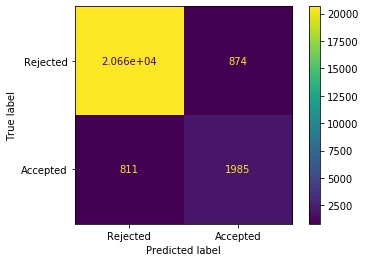|

Generally speaking, with 93% of accuracy rate and a Kappa higher than 0.6, this model is is performing satisfyingly except for being extremely overfitting with more than 3,000 leaves. Also, in this case, as the goal is to use prediction to gain more business opportunities by adjusting loan details for applications that might be rejected, the cost of predicting "accept" when "reject" is potentially higher than predicting "reject" when "accept".  Thus, higher recall than presicion might be ideal for further optimization and hyperparameter tuning.



In [0]:
# trying simple optimization, please ignore

clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Optimized")
print(f"    Number of Leaves: {clf.get_n_leaves()}")
print(f"    Accuracy: {100*accuracy:.1f}%")

Optimized
    Number of Leaves: 13
    Accuracy: 90.9%


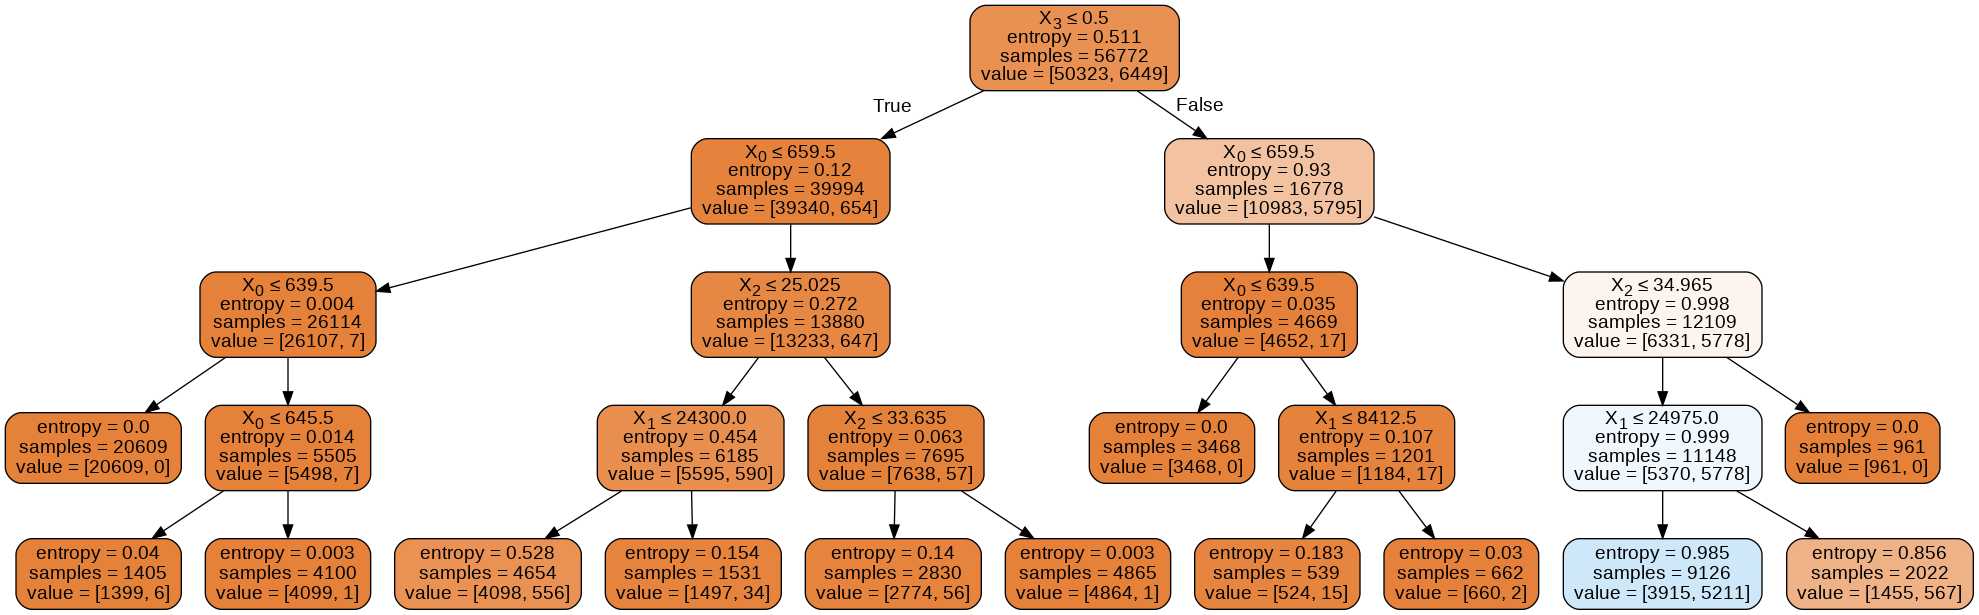

In [0]:
# trying to plot the decision tree, please ignore

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Lending Club DT.png')
Image(graph.create_png())

# Question 3: 

**Is the decision tree that you trained accurate enough to be used for each of the two business purposes you proposed in question 1? Why or why not?**

As described in Q2, I think the 93.3% accuracy and 0.66 kappa statistics calculated using the test set are satisfying enough to serve the purpose described in Q1 because the goal of applying the prediction is to achieve more potential deals from the possible rejected and greater amount of deals from the possible accepted applications. The steak of Type I and Type II errors are smaller than the potential gain from increase in transaction opportunities. For further optimizing, higher false positive rather than false negative rate and solution to overfitting should be achieved.

# Scoring Rubric
![alt text](https://docs.google.com/uc?export=view&id=1ELG4QWnPjWgiUJI0eL6YiVbMWKlSVdcP)
